# Epoch 2.2 - Traditional AI

## Resources
This epoch we will explore methods for **EDA** (Exploratory Data Analysis), **Data Cleaning** and **Pre-Processing** and methods for applying simple **Regression** and **Classification** techniques.




For more information on these topics, do refer to some of these resources:

- [Stanford Lecture on Exploratory Data Analysis](https://web.stanford.edu/class/archive/cs/cs448b/cs448b.1166/cgi-bin/wiki/images/4/44/Lec448B-20160406.pdf)

- [Stanford Lecture on Linear Regression](https://lagunita.stanford.edu/c4x/HumanitiesScience/StatLearning/asset/linear_regression.pdf)

- Classification
  - [Tree-based Methods](https://lagunita.stanford.edu/c4x/HumanitiesScience/StatLearning/asset/trees.pdf)
  - K-Nearest Neighbors
    - [Demo](http://vision.stanford.edu/teaching/cs231n-demos/knn/)
    - [MIT Lecture](https://ocw.mit.edu/courses/sloan-school-of-management/15-097-prediction-machine-learning-and-statistics-spring-2012/lecture-notes/MIT15_097S12_lec06.pdf)
  - [SVM](https://www.cs.princeton.edu/courses/archive/spring16/cos495/slides/ML_basics_lecture4_SVM_I.pdf)



## Cheat-Sheets

These **cheat-sheets** are incredibly useful for when getting your hands dirty. Keep them close:

- [numpy](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
- [pandas](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [sklearn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)


## Dog Breeds Dataset


This dataset contains, on each row, a dog. There is some information about the height of a dog, its weight, and some other (maybe redundant?) information.

**The goal is to make a model that, given some information about a dog, finds out its species.**

**In the same note, we ought to find a model that predicts a dog's longevity.**

There are also some **missing values**. Some of the values have very large values, relative to others.

We will explore how to clean this and pre-process this dataset. Check out [sklearn's preprocessing docs!](https://scikit-learn.org/stable/modules/preprocessing.html)

## 1. Imports and reading the data.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [0]:
# download the data from github
!wget https://raw.githubusercontent.com/cosmaadrian/dog-breeds/master/breeds.csv

--2019-11-14 17:37:24--  https://raw.githubusercontent.com/cosmaadrian/dog-breeds/master/breeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65864 (64K) [text/plain]
Saving to: ‘breeds.csv.4’

breeds.csv.4        100%[===================>]  64.32K  --.-KB/s    in 0.03s   

2019-11-14 17:37:24 (2.45 MB/s) - ‘breeds.csv.4’ saved [65864/65864]



In [0]:
df = pd.read_csv('breeds.csv')
df.head()

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy Level,Attention Needs,Coat Length,Sex,Owner Name
0,Australian Shepherd,21041.6994,NaN,12.9971,high,high,short,male,Rodriguez
1,Pit Bull,16991.8668,45.1886,12.0789,med,high,short,female,Hughes
2,Boxer,28429.3520,57.4321,9.7405,high,med,short,female,Jimenez
3,French Bulldog,11793.2472,NaN,10.6215,med,high,short,male,Ortiz
4,Australian Shepherd,26746.6297,NaN,12.9608,high,high,med,male,Blake


### Right off the bat, what can we observe here?

![](https://celebritydogwatcher.com/wp-content/uploads/2019/04/6c9bf05d7db622a091489726a4c8ed4f.jpeg)

# Coding Challenge #1 - 2 minutes

Use pandas to explore this dataset. 

- df.unique() for checking out unique values

- use df.isnull() for checking if there are missing values in the dataframe.

- use df.max(), df.min(), df.std(), df.mean() for statistical information on numeric columns.

In [0]:
# TODO explore the dataset.

print(df['Breed Name'].unique())
print(df['Attention Needs'].unique())
print(df['Energy Level'].unique())
print(df['Sex'].unique())
print(df['Owner Name'].unique()) # a lot of values!

['Australian Shepherd' 'Pit Bull' 'Boxer' 'French Bulldog']
['high' 'med']
['high' 'med' 'low']
['male' 'female']
['Rodriguez' 'Hughes' 'Jimenez' 'Ortiz' 'Blake' 'Garcia' 'James' 'Harris'
 'Graham' 'Davis' 'Sparks' 'Vazquez' 'Hill' 'Martinez' 'Wilson' 'Marks'
 'Reilly' 'Barnett' 'Taylor' 'Russo' 'Gibbs' 'Montgomery' 'Davenport'
 'Burns' 'Jones' 'Hunt' 'Rush' 'Anderson' 'Cook' 'Wood' 'Estes' 'Glover'
 'Thompson' 'Perkins' 'Gomez' 'Sanchez' 'Matthews' 'Guerrero' 'Prince'
 'Torres' 'Brown' 'Carroll' 'Watson' 'Carter' 'Smith' 'Fitzgerald'
 'Washington' 'Murphy' 'Collins' 'Arnold' 'Conway' 'Webster' 'Kirby'
 'Owens' 'Burton' 'Drake' 'Morales' 'Bryant' 'Howell' 'Martin' 'Parker'
 'Howard' 'Bailey' 'Lopez' 'Steele' 'Clark' 'Jackson' 'Johnson' 'Stewart'
 'Roth' 'Cross' 'Foster' 'Robinson' 'Stevens' 'Armstrong' 'Reyes' 'Solis'
 'Avila' 'Morgan' 'Santiago' 'Barker' 'Shea' 'Diaz' 'Wilcox' 'Baxter'
 'Allen' 'Scott' 'Fox' 'Walker' 'Abbott' 'Poole' 'Walls' 'Hernandez'
 'Bell' 'Edwards' 'Solomon' 'La

In [0]:
df['Height(cm)'].describe()

count    810.000000
mean      46.633936
std       11.210329
min       27.238300
25%       30.630550
50%       47.515300
75%       55.692900
max       62.784600
Name: Height(cm), dtype: float64

In [0]:
df['Weight(g)'].describe()

count     1000.000000
mean     22453.417533
std       7769.730240
min       3323.990600
25%      12857.108700
50%      23489.698050
75%      28171.614100
max      45555.975600
Name: Weight(g), dtype: float64

In [0]:
df['Longevity(yrs)'].describe()

count    1000.000000
mean       11.060328
std         1.657634
min         7.688500
25%         9.617925
50%        11.254350
75%        12.523400
max        14.510400
Name: Longevity(yrs), dtype: float64

## 2. Categorical Variables and Plotting

Statistical information like mean and standard deviation are informative, but a more visual representation of the dataset could be more useful in discovering our data.

In general, EDA relies heavily in visualizations and **asking questions** based on those visualizations.

Let's try to plot something from our data.

We can see that some columns are categorical - which is to say that their values are not continous, but are in a set of values. And there are strings. We should encode these values, to be compatible with our algorithms.

In [0]:
# Using pandas, we can assign numbers to each of our categories.
df['Breed Name'] = df['Breed Name'].astype('category').cat.codes
df['Energy Level'] = df['Energy Level'].astype('category').cat.codes
df['Attention Needs'] = df['Attention Needs'].astype('category').cat.codes
df['Coat Length'] = df['Coat Length'].astype('category').cat.codes
df['Sex'] = df['Sex'].astype('category').cat.codes
df['Owner Name'] = df['Owner Name'].astype('category').cat.codes

In [0]:
df.head()

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy Level,Attention Needs,Coat Length,Sex,Owner Name
0,0,21041.6994,NaN,12.9971,0,0,2,1,384
1,3,16991.8668,45.1886,12.0789,2,0,2,0,227
2,1,28429.3520,57.4321,9.7405,0,1,2,0,237
3,2,11793.2472,NaN,10.6215,2,0,2,1,341
4,0,26746.6297,NaN,12.9608,0,0,1,1,45


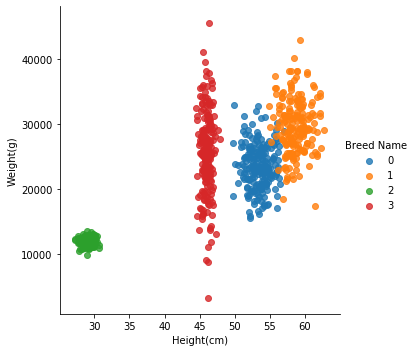

In [0]:
# sns.lmplot(x='Height(cm)', y='Longevity(yrs)', hue='Breed Name', data=df, fit_reg=False)
sns.lmplot(x='Height(cm)', y='Weight(g)', hue='Breed Name', data=df, fit_reg=False)

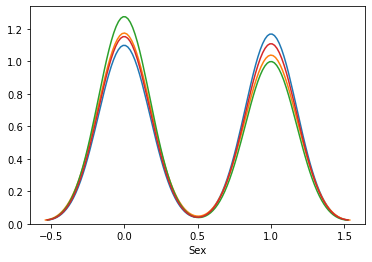

In [0]:
sns.distplot(df[df['Breed Name'] == 0]['Sex'], hist=False)
sns.distplot(df[df['Breed Name'] == 1]['Sex'], hist=False)
sns.distplot(df[df['Breed Name'] == 2]['Sex'], hist=False)
sns.distplot(df[df['Breed Name'] == 3]['Sex'], hist=False)

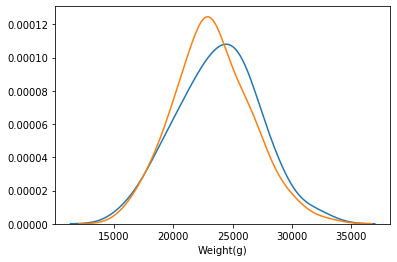

In [0]:
# Let's see for a class if there is some discernable difference in Weight for a female dog and a male dog.

sns.distplot(df[(df['Sex'] == 0) & (df['Breed Name'] == 0)]['Weight(g)'], hist=False)
sns.distplot(df[(df['Sex'] == 1) & (df['Breed Name'] == 0)]['Weight(g)'], hist=False)

Looks like the *Sex* attribute is useless for our purposes. Let's get rid of it!

In [0]:
df = df.drop(['Sex'], axis=1)
df.head()

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy Level,Attention Needs,Coat Length,Owner Name
0,0,21041.6994,NaN,12.9971,0,0,2,384
1,3,16991.8668,45.1886,12.0789,2,0,2,227
2,1,28429.3520,57.4321,9.7405,0,1,2,237
3,2,11793.2472,NaN,10.6215,2,0,2,341
4,0,26746.6297,NaN,12.9608,0,0,1,45


In [0]:
# What is up with Owner Name? Can that help us in a way?

# TODO: Decide what to do with the 'Owner Name'
# drop 'Owner Name', no use to us
df = df.drop(['Owner Name'], axis=1)
df.head()

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy Level,Attention Needs,Coat Length
0,0,21041.6994,NaN,12.9971,0,0,2
1,3,16991.8668,45.1886,12.0789,2,0,2
2,1,28429.3520,57.4321,9.7405,0,1,2
3,2,11793.2472,NaN,10.6215,2,0,2
4,0,26746.6297,NaN,12.9608,0,0,1


## 3. Missing values

We can see that the **height** column has some values that are missing. 

Missing values are a problem. There are multiple techniques that can help us fix this.

1000


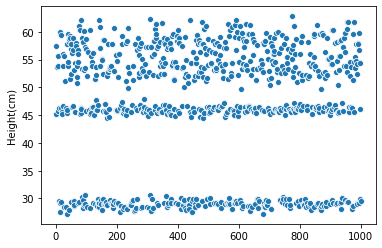

In [0]:
print(df['Height(cm)'].isnull().count())
sns.scatterplot(range(len(df.index)), df['Height(cm)'])

### Coding Challenge #2 -  5 minutes

Use `sklearn.impute.SimpleImputer` to fill in the blank values for Height(cm).

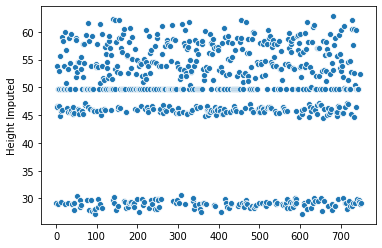

In [0]:
# TODO check out the documentation for SimpleImputer 
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

# Try out different strategies for imputing values and plot the results.
# DON'T use the Breed Name for imputing class-specific Heights. Remember that we should later predict this column using our model.
from sklearn.impute import SimpleImputer

# We mentioned that we should first split the DataFrame into train and test for a more rigurous testing
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df.copy())

imputer = SimpleImputer(strategy='median').fit(df_train['Height(cm)'].values.reshape(-1, 1))

df_train['Height Imputed'] = imputer.transform(df_train['Height(cm)'].values.reshape(-1, 1))
df_test['Height Imputed'] = imputer.transform(df_test['Height(cm)'].values.reshape(-1, 1))

sns.scatterplot(range(len(df_train.index)), df_train['Height Imputed'])

In [0]:
# an even better method is to train a simple LinearRegression to predict the missing values based on other attributes
# we will use Weight to predict Height

from sklearn.linear_model import LinearRegression

df_train, df_test = train_test_split(df.copy())

imputer_X = df_train[df_train['Height(cm)'].notnull()]['Weight(g)'].values.reshape(-1, 1)
imputer_y = df_train[df_train['Height(cm)'].notnull()]['Height(cm)'].values.reshape(-1, 1)

linear_imputer = LinearRegression()
linear_imputer.fit(imputer_X, imputer_y)

print(linear_imputer.score(imputer_X, imputer_y))

df_train.loc[df_train['Height(cm)'].isnull(), 'Height(cm)'] = linear_imputer.predict(df_train[df_train['Height(cm)'].isnull()]['Weight(g)'].values.reshape(-1, 1))
df_test.loc[df_test['Height(cm)'].isnull(), 'Height(cm)'] = linear_imputer.predict(df_test[df_test['Height(cm)'].isnull()]['Weight(g)'].values.reshape(-1, 1))

print(df_test.isnull().sum())
print(df_train.isnull().sum())

# we will use df_train and df_test from now on

0.637380757168564
Breed Name         0
Weight(g)          0
Height(cm)         0
Longevity(yrs)     0
Energy Level       0
Attention Needs    0
Coat Length        0
dtype: int64
Breed Name         0
Weight(g)          0
Height(cm)         0
Longevity(yrs)     0
Energy Level       0
Attention Needs    0
Coat Length        0
dtype: int64


In [0]:
df_train.head()

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy Level,Attention Needs,Coat Length
91,0,28080.5900,53.1303,13.0582,0,0,1
348,1,25725.9709,61.5010,8.6452,0,1,2
311,3,23794.9414,45.4077,11.6109,2,0,1
727,0,23824.6145,51.0090,12.9008,0,0,1
176,2,12586.7189,29.7572,9.0285,2,0,2


## 3. Normalization
We see that that the *Weight* and *Height* columns have very large values. We should normalize these values. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. 

## Coding Challenge #3 - 5 minutes

In [0]:
# Use sklearn.preprocessing.StandardScaler and sklearn.preprocessing.MinMaxScaler
# to normalize the values in the Weight and Height columns.

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# we'll use just StandardScaler here
standard_scaler = StandardScaler()
standard_scaler.fit(df_train['Height(cm)'].values.reshape(-1, 1))

df_train['Height Normalized'] = standard_scaler.transform(df_train['Height(cm)'].values.reshape(-1, 1))
df_test['Height Normalized'] = standard_scaler.transform(df_test['Height(cm)'].values.reshape(-1, 1))

standard_scaler = StandardScaler()
standard_scaler.fit(df_train['Weight(g)'].values.reshape(-1, 1))


df_train['Weight Normalized'] = standard_scaler.transform(df_train['Weight(g)'].values.reshape(-1, 1))
df_test['Weight Normalized'] = standard_scaler.transform(df_test['Weight(g)'].values.reshape(-1, 1))

# your code here

df_train['Weight Normalized'].describe()

count    7.500000e+02
mean     1.258253e-17
std      1.000667e+00
min     -1.729005e+00
25%     -1.223656e+00
50%      1.314593e-01
75%      7.542872e-01
max      2.986460e+00
Name: Weight Normalized, dtype: float64

## 4. Encoding categorical features.

Categorical numbers like (1, 2, 3, 4) imply some sort of ordering of the values. Maybe that is true like in the case of olympic prizes. Most of the time we don't want that implicit ordering. 

For that we will use **one-hot encoding.**


In [0]:
df_train = pd.concat([
         df_train,
         pd.get_dummies(df_train['Coat Length'], prefix='Coat Length'),
         pd.get_dummies(df_train['Energy Level'], prefix='Energy Level'),
         pd.get_dummies(df_train['Attention Needs'], prefix='Attention Needs'),
], axis=1).drop([
         'Coat Length',
         'Energy Level', 
         'Attention Needs',
         'Weight(g)', # dropping these, they are useless now because we normalized them
         'Height(cm)',
], axis=1)

df_train.head()

,Breed Name,Longevity(yrs),Height Normalized,Weight Normalized,Coat Length_0,Coat Length_1,Coat Length_2,Energy Level_0,Energy Level_1,Energy Level_2,Attention Needs_0,Attention Needs_1
91,0,13.0582,0.614549,0.744530,0,1,0,1,0,0,1,0
348,1,8.6452,1.377896,0.442454,0,0,1,1,0,0,0,1
311,3,11.6109,-0.089696,0.194721,0,1,0,0,0,1,1,0
727,0,12.9008,0.421102,0.198528,0,1,0,1,0,0,1,0
176,2,9.0285,-1.516908,-1.243190,0,0,1,0,0,1,1,0


In [0]:
# doing the same for test

df_test = pd.concat([
         df_test,
         pd.get_dummies(df_test['Coat Length'], prefix='Coat Length'),
         pd.get_dummies(df_test['Energy Level'], prefix='Energy Level'),
         pd.get_dummies(df_test['Attention Needs'], prefix='Attention Needs'),
], axis=1).drop([
         'Coat Length',
         'Energy Level', 
         'Attention Needs',
         'Weight(g)', # dropping these, they are useless now because we normalized them
         'Height(cm)',
], axis=1)

df_test.head()

,Breed Name,Longevity(yrs),Height Normalized,Weight Normalized,Coat Length_0,Coat Length_1,Coat Length_2,Energy Level_0,Energy Level_1,Energy Level_2,Attention Needs_0,Attention Needs_1
185,1,8.5302,0.682449,0.826399,0,1,0,1,0,0,1,0
599,0,11.9938,0.746596,-0.316037,0,1,0,1,0,0,1,0
899,2,10.1617,-1.582895,-1.312368,0,0,1,0,0,1,1,0
85,1,7.9939,1.134402,1.044356,0,0,1,0,0,1,1,0
641,3,11.9552,-0.026773,-0.747297,0,0,1,1,0,0,1,0


## 5. Feature Engineering

We can use our domain knowledge to create aditional features for our model. 

For instance, we know that the **BMI (Body Mass Index)** is equal to the weight over the height of a person. But that can extend to dogs as well. If the model is complex enough, it can uncover such relationships on its own, given enough data. But it could be helpful in some situations to provide such information from the beginning, especially for a weak learner (like linear models).

In [0]:
# TODO: add an aditional column called BMI == Weight / Height.
df_train['BMI'] = df_train['Weight Normalized'] / df_train['Height Normalized']
df_test['BMI'] = df_test['Weight Normalized'] / df_test['Height Normalized']

df_train.head()

,Breed Name,Longevity(yrs),Height Normalized,Weight Normalized,Coat Length_0,Coat Length_1,Coat Length_2,Energy Level_0,Energy Level_1,Energy Level_2,Attention Needs_0,Attention Needs_1,BMI
91,0,13.0582,0.614549,0.744530,0,1,0,1,0,0,1,0,1.211507
348,1,8.6452,1.377896,0.442454,0,0,1,1,0,0,0,1,0.321109
311,3,11.6109,-0.089696,0.194721,0,1,0,0,0,1,1,0,-2.170902
727,0,12.9008,0.421102,0.198528,0,1,0,1,0,0,1,0,0.471449
176,2,9.0285,-1.516908,-1.243190,0,0,1,0,0,1,1,0,0.819555


Ok, now we're ready for do some data modeling.

# 6. Regression

Let's make a model that predicts a dog's longevity, based on its breed.
First, we should split our dataset into train and testing sets, we properly evaluate our model. We are interested in predicting `Longevity(yrs)`.

![](https://hackernoon.com/hn-images/1*SBUK2QEfCP-zvJmKm14wGQ.png)


In [0]:
from sklearn.model_selection import train_test_split

X_train = df_train.drop(['Longevity(yrs)'], axis=1)
X_test = df_test.drop(['Longevity(yrs)'], axis=1)

y_train = df_train['Longevity(yrs)']
y_test = df_test['Longevity(yrs)']

In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


model = LinearRegression()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2129783966541479

# 7. Classification

Let's classify our dog breeds! First, we should split our dataset into train and testing sets, we properly evaluate our model. We are interested in predicting `Breed Name`.

In [0]:
from sklearn.model_selection import train_test_split

X_train = df_train.drop(['Breed Name'], axis=1)
X_test = df_test.drop(['Breed Name'], axis=1)

y_train = df_train['Breed Name']
y_test = df_test['Breed Name']


In [0]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

model = SVC(kernel='linear') # try out different classifiers and parameters.
model.fit(X_train, y_train)

print(model.score(X_train, y_train), model.score(X_test, y_test))

0.992 0.972


# N.B.

When imputing values, or normalizing using the standard scaler / min-max scaler, it is important that this normalization is performed only on the information provided in the training set. 

Otherwise, the evaluation on the test set is meaningless. Our model uses samples it theoretically never saw!

Check out [Kaggle](https://www.kaggle.com/)! There are plenty of datasets you can hone your skills on. 

Also **competitions**. With **money**. Team up and go!